# SVM ハードマージン
人工データの種類　線形, 円状（Circle）, 月状（Moon）を扱う。<br>
線形分離とカーネル関数を用いた非線形分離<br>
sklearn.svm.SVC　http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html  

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.datasets import make_classification, make_circles, make_moons 

# 散布図で独自のカラーマップを使用
from matplotlib.colors import ListedColormap 
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

FLAG_fig = False

2クラス(0, 1)のデータ生成，詳細は次を参照  
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

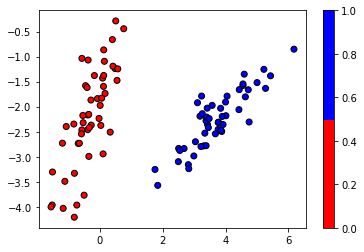

In [2]:
X, y = make_classification( n_samples=100, n_features=2, n_informative=2, n_redundant=0, 
                            n_classes=2, n_clusters_per_class=1, 
                            class_sep=2.0, #　大きいほどクラス分離の距離が大きい 
                            shift=None, 
                            random_state=5) # 整数を与えると乱数の再現性がある
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm_bright, edgecolors='k')
plt.colorbar()
if FLAG_fig: plt.savefig('fig_SVM_HM_LN_01.png')
plt.show()

smv.SVC のドキュメント  
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html  
http://scikit-learn.org/stable/modules/svm.html

In [3]:
clf = svm.SVC(kernel='linear', C=1000) # clf : classificationの略, 線形カーネル（内積）
clf.fit(X, y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

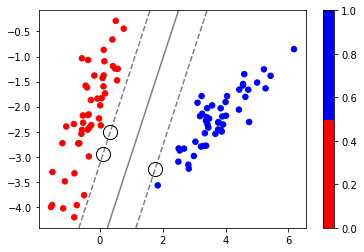

In [4]:
cbar = plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=cm_bright) # c=y, yが示すラベル0, 1で色分け
plt.colorbar(cbar)
# plot the decision function
ax = plt.gca() # get current axis
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
# 超平面までの距離を求め，次にグリッドに合わせてreshape((30,30))
Z = clf.decision_function(xy).reshape(XX.shape) 
# マージンの境界線と超平面を等高線に描く
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, #等高線の本数と間隔をlevelsで指定
           linestyles=['--', '-', '--'])
# サポートベクタを白丸でプロット
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, c='w', edgecolors='k')
if FLAG_fig: plt.savefig('fig_SVM_HM_LN_02.png')
plt.show()

In [11]:
#testX=np.array([[1.0, -3.0], [1.0, -2.5]])
testX=np.array([[0.0, 2.0], [0.0, -1.5]])
judge = clf.predict(testX)
judge

array([0, 0])

Circles　円状のデータ生成　
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html

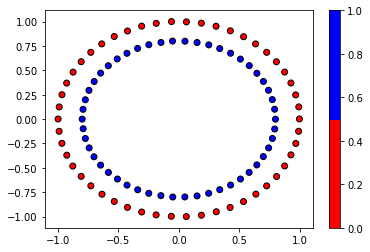

In [12]:
X, y = make_circles(noise = 0.001, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm_bright, edgecolors='k')
plt.colorbar()
if FLAG_fig: plt.savefig('fig_SVM_HM_CIR_01.png')
plt.show()

In [13]:
clf = svm.SVC(kernel='rbf', C=1000) # ガウシアンカーネル
clf.fit(X, y)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

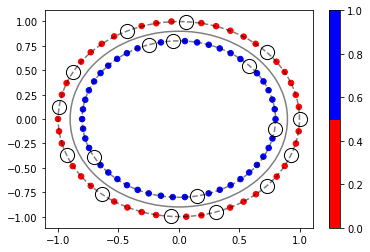

In [14]:
cbar = plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=cm_bright) # yは，ラベル0, 1があり，それで色分け
plt.colorbar(cbar)
# plot the decision function
ax = plt.gca() # get current axis
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape) #超平面までの距離を求め，次に グリッドに合わせてreshape((30,30))
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], #等高線の本数と間隔をlevelsで指定
           alpha=0.5, linestyles=['--', '-', '--'])
# サポートベクタを白丸でプロット
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, c='w', edgecolors='k')
if FLAG_fig: plt.savefig('fig_SVM_HM_CIR_02.png')
plt.show()

Moons 月状のデータ生成　http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

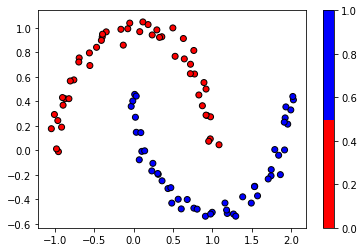

In [19]:
X, y = make_moons(noise = 0.05, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm_bright, edgecolors='k')
plt.colorbar()
if FLAG_fig: plt.savefig('fig_SVM_HM_MO_01.png')
plt.show()

In [20]:
clf = svm.SVC(kernel='poly', degree=3, coef0=1.0, C=1000) # 多項式カーネル
clf.fit(X, y)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

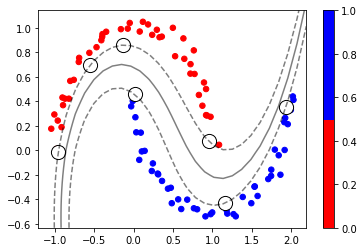

In [21]:
cbar = plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=cm_bright) # yは，ラベル0, 1があり，それで色分け
plt.colorbar(cbar)
# plot the decision function
ax = plt.gca() # get current axis
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape) #超平面までの距離を求め，次に グリッドに合わせてreshape((30,30))
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, #等高線の本数と間隔をlevelsで指定
           linestyles=['--', '-', '--'])
# サポートベクタを白丸でプロット
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, c='w', edgecolors='k')
if FLAG_fig: plt.savefig('fig_SVM_HM_MO_02.png')
plt.show()